# Telco Customer Churn Analysis and Prediction

## Import Library

In [1]:
# Data Load and Exploration Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models (Classification Problem)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading and Exploration Data

In [2]:
files.upload()
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn_df = df.copy()

### Statistik Deskriptif

In [39]:
# Menghitung statistik deskriptif pada kolom bertipe data numerik
churn_df[['Tenure', 'MonthlyCharges', 'TotalCharges']].describe().round(2)

,Tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.73
std,24.56,30.09,2266.79
min,0.00,18.25,0.00
25%,9.00,35.50,398.55
50%,29.00,70.35,1394.55
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


In [35]:
# Hitung total dan persentase churn
churn_summary = churn_df['Churn'].value_counts().to_frame(name='Total')
churn_summary['Percentage'] = (churn_summary['Total'] / churn_summary['Total'].sum()) * 100

# Tampilkan hasil
churn_summary.round(2)

,Total,Percentage
Churn,,
No,5174,73.46
Yes,1869,26.54


### Mengubah Nama Kolom dan Tipe Data

In [5]:
# Merubah nama kolom
churn_df.rename(columns={'gender': 'Gender'}, inplace=True)
churn_df.rename(columns={'tenure': 'Tenure'}, inplace=True)
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Mengubah beberapa kolom menjadi tipe kategori
categorical_column = [
    'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]
for column in categorical_column:
    churn_df[column] = churn_df[column].astype('category')

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   Tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Mengecek Missing Value

In [7]:
churn_df.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Data Preprocessing

### Handling Missing Value

In [8]:
# Menghitung jumlah nilai kosong/spasi di setiap kolom
jumlah_kosong = churn_df.apply(lambda col: col.apply(lambda x: isinstance(x, str) and x.strip() == '').sum())
print("Jumlah nilai kosong/berisi spasi per kolom:\n", jumlah_kosong)

# Menampilkan baris-baris yang mengandung nilai kosong atau hanya berisi spasi
mask_kosong = churn_df.map(lambda x: isinstance(x, str) and x.strip() == '')
baris_kosong = churn_df[mask_kosong.any(axis=1)]
print("\nBaris yang mengandung nilai kosong atau hanya spasi:\n", baris_kosong)

Jumlah nilai kosong/berisi spasi per kolom:
 customerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Baris yang mengandung nilai kosong atau hanya spasi:
       customerID  Gender SeniorCitizen Partner Dependents  Tenure  \
488   4472-LVYGI  Female            No     Yes        Yes       0   
753   3115-CZMZD    Male            No      No        Yes       0   
936   5709-LVOEQ  Female            No     Yes        Yes       0   
1082  4367-NUYAO    Male            No     Yes        Yes       0   
1340  1371-DWPAZ  Female            No     Yes        Yes  

In [9]:
# Mengonversi kolom 'TotalCharges' menjadi tipe numerik
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# Mengisi nilai NaN pada 'TotalCharges' dengan 0
churn_df['TotalCharges'] = churn_df['TotalCharges'].fillna(0)

# Mengubah 'TotalCharges' menjadi tipe float
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype('float')

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   Tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Data Splitting

In [10]:
# Memisahkan fitur (X) dan target (y)
X = churn_df.drop(columns=['customerID', 'Churn'])
y = churn_df['Churn'].map({'Yes': 1, 'No': 0})

In [11]:
# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X)

# Simpan nama kolom
X_columns = X.columns

In [12]:
# Normalisasi fitur numerik
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X[numerical_features].head()

,Tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874


In [13]:
print("Cek tipe data sebelum split:")
print(X.dtypes)

Cek tipe data sebelum split:
Tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
Gender_Female                                 bool
Gender_Male                                   bool
SeniorCitizen_No                              bool
SeniorCitizen_Yes                             bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
On

In [14]:
# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# Menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(X_train))
# Menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(X_test))

Jumlah data:  7043
Jumlah data latih:  5634
Jumlah data test:  1409


## Data Visualization

### Multivariate Analysis: Categorical Features vs. Churn

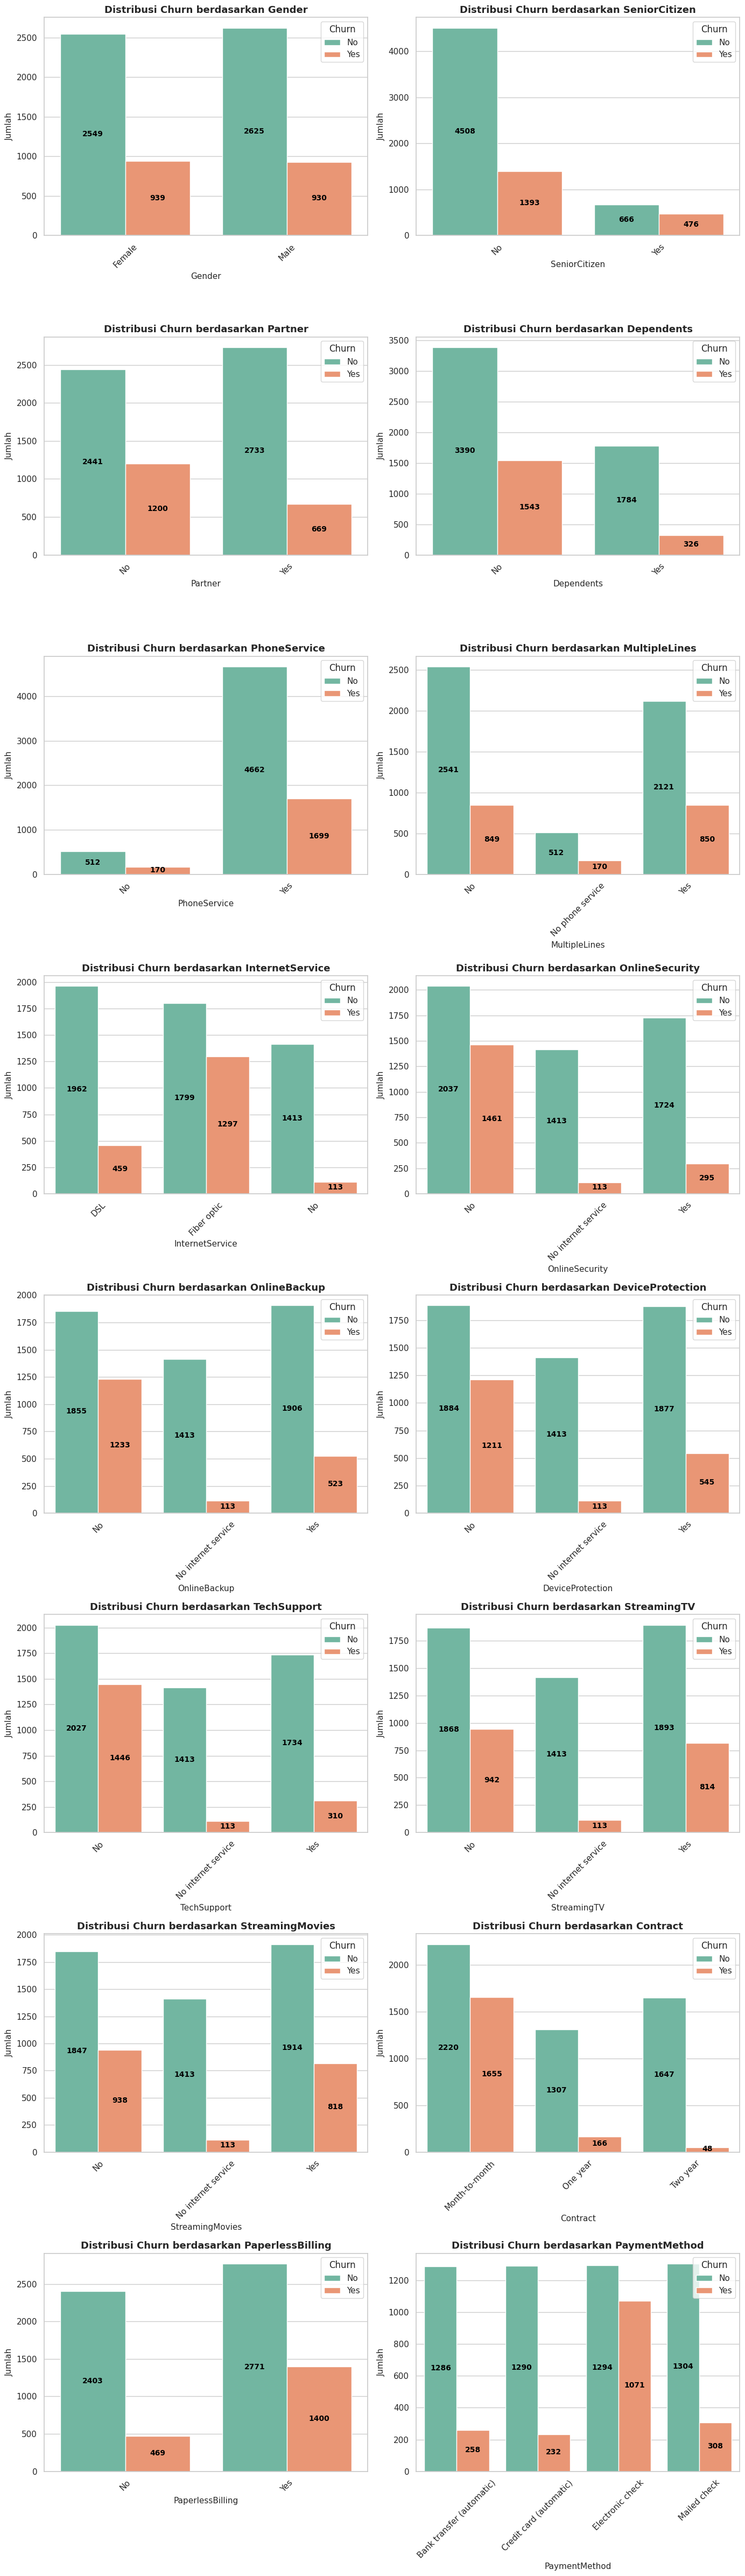

In [16]:
# Atur gaya dan palet warna
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Kolom kategorikal kecuali 'Churn'
categorical_columns = churn_df.select_dtypes(include='category').columns.drop('Churn')

# Hitung jumlah plot
n = len(categorical_columns)
cols = 2  # 2 plot per baris
rows = (n + 1) // cols  # Hitung jumlah baris yang diperlukan

plt.figure(figsize=(14, 6 * rows))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(rows, cols, i)
    ax = sns.countplot(data=churn_df, x=col, hue="Churn", palette=palette)

    # Tambahkan anotasi jumlah pada batang
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_height() * 0.5 + 5
            ax.annotate(f'{count}', (x, y), ha='center', va='center',
                        fontsize=10, fontweight='bold', color='black')

    plt.title(f"Distribusi Churn berdasarkan {col}", fontsize=13, fontweight='bold')
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Jumlah", fontsize=11)
    plt.xticks(rotation=45)
    plt.legend(title="Churn", loc='upper right')

plt.tight_layout()
plt.show()

#### Insight
Untuk mengeksplorasi bagaimana berbagai fitur kategorikal memengaruhi customer churn, berdasarkan visualisasi distribusi jumlah.
1. Gender
  - Tingkat churn hampir sama di seluruh gender.
  - **Insight:** Gender tidak terlalu memengaruhi churn.
2. SeniorCitizen
  - Senior citizen memiliki tingkat churn lebih tinggi dibandingkan non-senior.
  - **Insight:** Pelanggan yang lebih tua cenderung lebih mungkin berhenti berlangganan.
3. Partner
  - Pelanggan tanpa partner cenderung lebih sering churn.
  - **Insight:** Tinggal bersama partner mungkin berkontribusi terhadap stabilitas pelanggan.
4. Dependents
  - Mereka yang tidak memiliki dependents lebih sering churn.
  - **Insight:** Pelanggan dengan tanggungan mungkin memiliki kebutuhan layanan yang lebih konsisten.
5. PhoneServuce
  - Sebagian besar pelanggan memiliki phone service.
  - Churn secara proporsional lebih rendah pada mereka yang tidak memiliki phone service.
  - **Insight:** Phone service sendiri bukan pendorong utama churn
6. MultipleLines
  - Sedikit lebih banyak churn terjadi pada pelanggan dengan multiple lines.
  - **Insight:** Mengelola beberapa jalur mungkin menambah ketidakpuasan.
7. InternetService
  - Pengguna fiber optic memiliki tingkat churn tertinggi.
  - Pengguna DSL churn lebih sedikit, dan yang tidak memiliki internet churn paling rendah.
  - **Insight:** Pengguna fiber mungkin memiliki ekspektasi lebih tinggi atau ketidakpuasan terhadap harga.
8. Online Services (Security, Backup, Device Protection, Tech Support)
  - Pelanggan tanpa layanan online churn secara signifikan lebih tinggi.
  - **Insight:** Value-added services dapat mengurangi churn.
  - **Action:** Tawarkan layanan ini untuk meningkatkan retensi.
9. Streaming Services (TV & Movies)
  - Churn lebih tinggi pada mereka yang tidak menggunakan streaming services.
  - **Insight:** Keterlibatan hiburan berkorelasi dengan retensi pelanggan.
10. Contract Type
  - Month-to-month contracts memiliki tingkat churn yang sangat tinggi.
  - Two-year contracts memiliki churn terendah.
  - **Insight:** Long-term contracts secara signifikan mengurangi churn.
  - **Action:** Tawarkan insentif untuk peningkatan kontrak.
11. Paperless Billing
  - Churn lebih tinggi pada pelanggan dengan paperless billing.
  - I**nsight:** Kemungkinan terkait dengan pengguna yang melek digital dan sering membandingkan dengan pesaing.
12. Payment Method
  - Tingkat churn tertinggi pada pengguna Electronic Check.
  - Churn terendah pada pengguna Credit Card, Mailed Check, atau Bank Transfers.
  - **Insight:** Hambatan dalam metode pembayaran dapat meningkatkan churn.

### Churn Analysis Based on Key Numerical Features

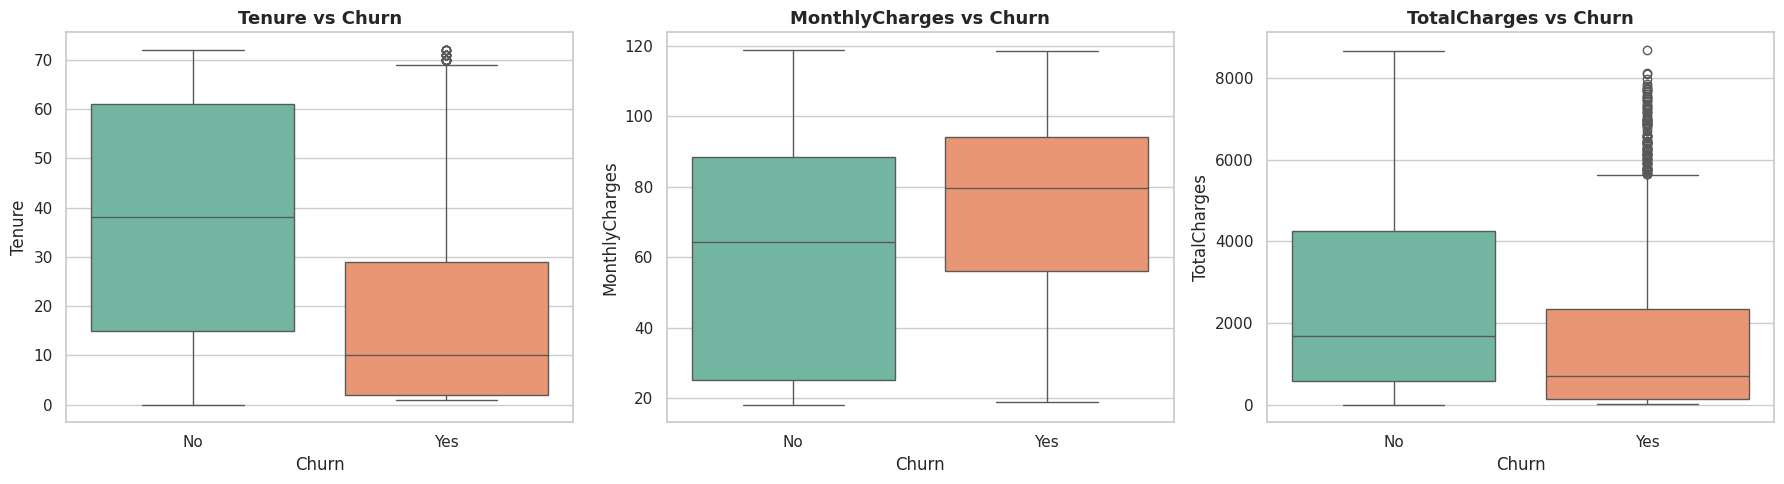

In [17]:
# Pilih hanya kolom numerik dari DataFrame
numerical_columns = churn_df.select_dtypes(include=['int64', 'float64'])

# Atur gaya tampilan visualisasi
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Buat subplot: 1 baris, 3 kolom
plt.figure(figsize=(18, 5))

for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=churn_df, x='Churn', y=feature, palette=palette)
    plt.title(f'{feature} vs Churn', fontsize=13, fontweight='bold')
    plt.xlabel("Churn")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

#### Insight
1. Tenure vs Churn
  - Observation: Pelanggan yang churn (Ya) cenderung memiliki masa berlangganan (tenure) yang lebih pendek dengan perusahaan.
  - Insight: Median tenure untuk pelanggan yang churn secara signifikan lebih rendah dibanding yang tidak churn.
  - Interpretation: Churn lebih umum terjadi pada tahap awal siklus hidup pelanggan.
  - Actionable Recommendation:
    - Fokuskan strategi retensi pada pelanggan baru, terutama pada tahun pertama.
    - Tawarkan insentif loyalitas, panduan onboarding, dan dukungan personal sejak awal.

2. Monthly Charges vs Churn
  - Observation: Pelanggan yang churn umumnya memiliki biaya bulanan yang lebih tinggi.
  - Insight: Distribusi menunjukkan bahwa pelanggan yang churn membayar lebih mahal rata-rata dibanding yang tidak churn.
  - Interpretation: Harga yang lebih tinggi mungkin berkontribusi terhadap ketidakpuasan pelanggan.
  - Actionable Recommendation:
    - Evaluasi ulang harga untuk segmen dengan biaya tinggi.
    - Tawarkan layanan bernilai tambah atau paket diskon untuk pelanggan dengan risiko churn yang tinggi.

3. Total Charges vs Churn
  - Observation: Pelanggan yang churn memiliki total pembayaran yang lebih rendah dibanding pelanggan loyal.
  - Insight: Menunjukkan bahwa mereka churn lebih awal dalam kontrak, meskipun mungkin memiliki tarif bulanan tinggi.
  - Interpretation: Kerugian total pendapatan per pelanggan yang churn cukup besar.
  - Actionable Recommendation:
    - Kurangi churn untuk meningkatkan nilai umur pelanggan (CLV).
    - Terapkan prediksi churn secara proaktif dan lakukan intervensi lebih awal.


Kesimpulan:
- Pelanggan yang Churn = Tenure pendek + Biaya bulanan tinggi + Total pendapatan rendah.
- Strategi Utama: Fokus pada keterlibatan awal dan penyesuaian harga yang personal.

Langkah Selanjutnya:
- Gunakan machine learning untuk membangun model prediksi churn.

## Model Training

In [18]:
# Melatih Model 1 dengan algoritma K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Melatih Model 2 dengan algoritma Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Melatih Model 3 dengan algoritma Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Melatih model 4 dengan algoritma Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Melatih model 5 dengan algoritma Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Melatih model 6 dengan algoritma SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Melatih model 7 dengan algoritma ABClassifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

# Melatih model 8 dengan algoritma GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
print(X_train.dtypes)

Tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
Gender_Female                                 bool
Gender_Male                                   bool
SeniorCitizen_No                              bool
SeniorCitizen_Yes                             bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

## Model Evaluation

### Akurasi, Confusion Matrix, Classification Report.

Evaluasi Model: K-Nearest Neighbors
Accuracy: 0.7715
F1-Score: 0.7694
Precision: 0.7677
Recall: 0.7715

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.57      0.54      0.56       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



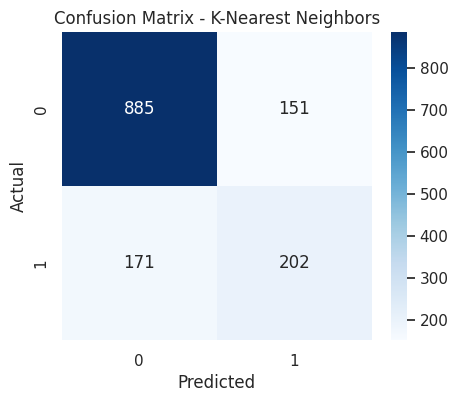



Evaluasi Model: Random Forest
Accuracy: 0.7921
F1-Score: 0.7806
Precision: 0.7792
Recall: 0.7921

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



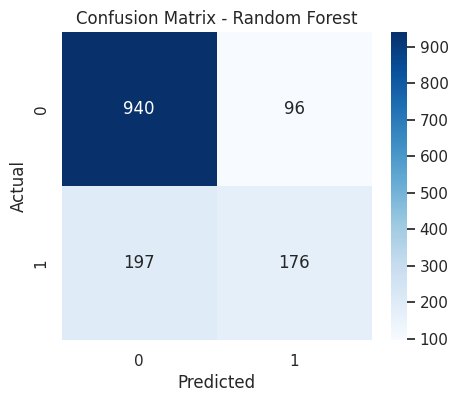



Evaluasi Model: Decision Tree
Accuracy: 0.7189
F1-Score: 0.7208
Precision: 0.7228
Recall: 0.7189

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.47      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.72      0.72      1409



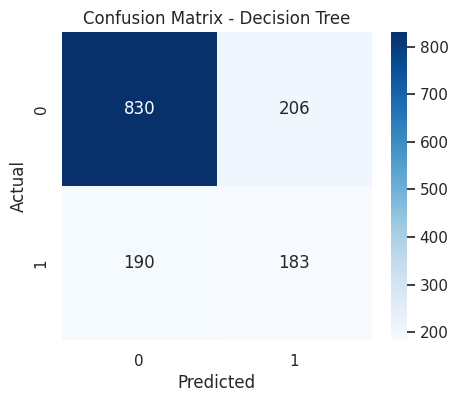



Evaluasi Model: Logistic Regression
Accuracy: 0.8211
F1-Score: 0.8170
Precision: 0.8152
Recall: 0.8211

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



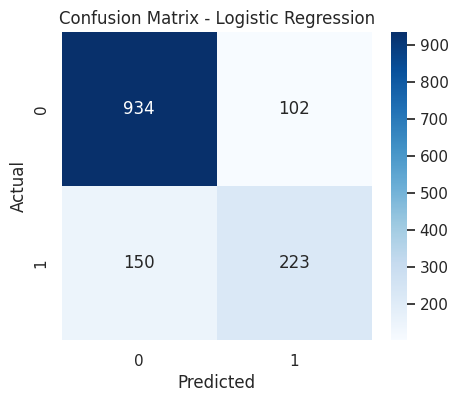



Evaluasi Model: Naive Bayes
Accuracy: 0.6962
F1-Score: 0.7141
Precision: 0.8044
Recall: 0.6962

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.64      0.75      1036
           1       0.46      0.86      0.60       373

    accuracy                           0.70      1409
   macro avg       0.69      0.75      0.68      1409
weighted avg       0.80      0.70      0.71      1409



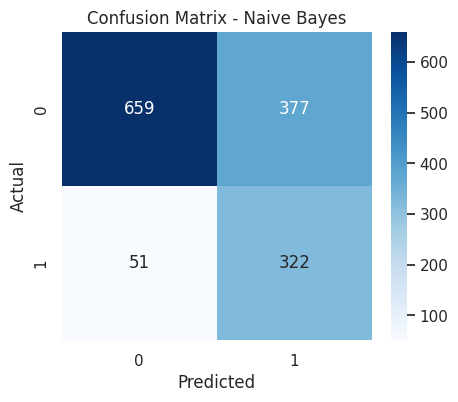



Evaluasi Model: SVC
Accuracy: 0.8119
F1-Score: 0.8028
Precision: 0.8022
Recall: 0.8119

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



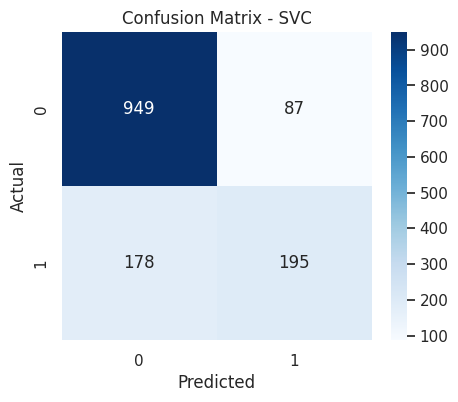



Evaluasi Model: AdaBoost
Accuracy: 0.8084
F1-Score: 0.8033
Precision: 0.8011
Recall: 0.8084

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



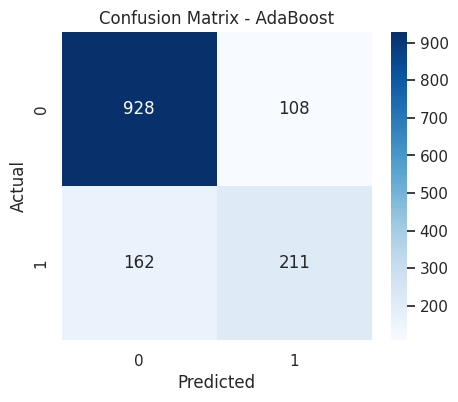



Evaluasi Model: GradientBoosting
Accuracy: 0.8098
F1-Score: 0.8031
Precision: 0.8012
Recall: 0.8098

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



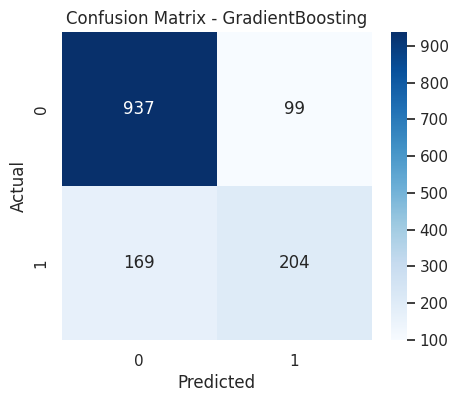

In [20]:
# List model yang akan dievaluasi
models = {
    "K-Nearest Neighbors": knn,
    "Random Forest": rf,
    "Decision Tree": dt,
    "Logistic Regression": lr,
    "Naive Bayes": nb,
    "SVC": svc,
    "AdaBoost": ada,
    "GradientBoosting": gbc
}

# Dictionary untuk menyimpan hasil evaluasi
results = {
    "Model": [],
    "Accuracy": [],
    "F1-Score": [],
    "Precision": [],
    "Recall": []
}

# Lakukan prediksi pada data uji dan evaluasi setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print hasil evaluasi
    print(f"Evaluasi Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Buat Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("\n")

    # Simpan hasil ke dalam dictionary
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["F1-Score"].append(f1)
    results["Precision"].append(precision)
    results["Recall"].append(recall)

In [52]:
# Ubah dictionary menjadi DataFrame dan urutkan berdasarkan Accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("Evaluasi Model - Diurutkan berdasarkan Akurasi:")
display((results_df).round(2))

Evaluasi Model - Diurutkan berdasarkan Akurasi:


,Model,Accuracy,F1-Score,Precision,Recall
0,Logistic Regression,0.82,0.82,0.82,0.82
1,SVC,0.81,0.80,0.80,0.81
2,GradientBoosting,0.81,0.80,0.80,0.81
3,AdaBoost,0.81,0.80,0.80,0.81
4,Random Forest,0.79,0.78,0.78,0.79
5,K-Nearest Neighbors,0.77,0.77,0.77,0.77
6,Decision Tree,0.72,0.72,0.72,0.72
7,Naive Bayes,0.70,0.71,0.80,0.70


#### Insight
Dari hasil Evaluasi Model terlihat Algoritma Logistic Regression memiliki nilai akurasi yang paling tinggi dari ke-8 model yang saya gunakan yaitu persentase mencapai 82%.

### Feature Importance

In [22]:
# Ambil nama kolom dari data training
feature_names = X_train.columns

# Ambil koefisien dari model Logistic Regression
coefficients = lr.coef_[0]

# Buat DataFrame untuk melihat pengaruh tiap fitur
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
})

# Urutkan berdasarkan pengaruh terbesar
top_features_lr = importance_df.sort_values(by='AbsCoefficient', ascending=False).head(5)

print("Top 5 Fitur Paling Berpengaruh (Logistic Regression):")
top_features_lr[['Feature', 'Coefficient']]

Top 5 Fitur Paling Berpengaruh (Logistic Regression):


,Feature,Coefficient
0,Tenure,-1.344541
39,Contract_Two year,-0.824828
2,TotalCharges,0.638322
37,Contract_Month-to-month,0.604211
16,InternetService_DSL,-0.537983


In [23]:
# Ambil nama fitur
feature_names = X_train.columns

# Ambil feature importance dari model
importances = rf.feature_importances_  # Misalnya model bernama rf

# Buat DataFrame
importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Urutkan berdasarkan pentingnya
top_features_rf = importance_df_rf.sort_values(by='Importance', ascending=False).head(5)

print("Top 5 Fitur Paling Berpengaruh (Random Forest):")
top_features_rf

Top 5 Fitur Paling Berpengaruh (Random Forest):


,Feature,Importance
2,TotalCharges,0.159605
0,Tenure,0.140122
1,MonthlyCharges,0.138030
37,Contract_Month-to-month,0.047135
19,OnlineSecurity_No,0.032908


In [24]:
# Ambil fitur dari kolom 'Feature' lalu ubah ke set
tf_lr = set(top_features_lr['Feature'])
tf_rf = set(top_features_rf['Feature'])

# Gabungkan fitur unik dari kedua model ke list
combined_features = list(tf_lr.union(tf_rf))

# Buat DataFrame dari list fitur tersebut
combined_df = pd.DataFrame(combined_features, columns=['Feature'])

print("Variabel-variabel yang paling berpengaruh terhadap churn:\n")
combined_df

Variabel-variabel yang paling berpengaruh terhadap churn:



,Feature
0,InternetService_DSL
1,Tenure
2,Contract_Month-to-month
3,OnlineSecurity_No
4,MonthlyCharges
5,Contract_Two year
6,TotalCharges


#### Insight
Fitur-fitur di atas adalah variabel-variabel penting yang memengaruhi churn pelanggan berdasarkan hasil dua model berbeda.

## Inference Model

In [25]:
# Data baru yang akan diprediksi
sample_data = pd.DataFrame({
    'gender': ['Male', 'Female', 'Female', 'Male'],
    'SeniorCitizen': [0, 0, 0, 1],
    'Partner': ['Yes', 'Yes', 'Yes', 'No'],
    'Dependents': ['No', 'Yes', 'Yes', 'No'],
    'tenure': [12, 72, 70, 1],
    'PhoneService': ['Yes', 'Yes', 'Yes', 'Yes'],
    'MultipleLines': ['No', 'Yes', 'Yes', 'No'],
    'InternetService': ['Fiber optic', 'DSL', 'DSL', 'Fiber optic'],
    'OnlineSecurity': ['No', 'Yes', 'Yes', 'No'],
    'OnlineBackup': ['Yes', 'Yes', 'Yes', 'No'],
    'DeviceProtection': ['No', 'Yes', 'Yes', 'No'],
    'TechSupport': ['No', 'Yes', 'Yes', 'No'],
    'StreamingTV': ['Yes', 'Yes', 'Yes', 'Yes'],
    'StreamingMovies': ['No', 'Yes', 'Yes', 'Yes'],
    'Contract': ['Month-to-month', 'Two year', 'Two year', 'Month-to-month'],
    'PaperlessBilling': ['Yes', 'No', 'No', 'Yes'],
    'PaymentMethod': ['Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check'],
    'MonthlyCharges': [75.5, 65.0, 55.2, 95.7],
    'TotalCharges': [900.5, 4500.0, 3800.5, 95.7]
})

# One-hot encode data baru
new_data_encoded = pd.get_dummies(sample_data)

# Reindex agar kolom sesuai dengan X_columns saat training
new_data_encoded = new_data_encoded.reindex(columns=X_columns, fill_value=0)

# Lakukan scaling hanya untuk kolom numerik
new_data_encoded[numerical_features] = scaler.transform(new_data_encoded[numerical_features])

# Prediksi semua baris
pred = lr.predict(new_data_encoded)

# Interpretasi hasil untuk semua data
for i, p in enumerate(pred):
    print(f"Data ke-{i+1} prediksi churn:", "Ya (Churn)" if p == 1 else "Tidak (Tidak Churn)")

Data ke-1 prediksi churn: Ya (Churn)
Data ke-2 prediksi churn: Tidak (Tidak Churn)
Data ke-3 prediksi churn: Tidak (Tidak Churn)
Data ke-4 prediksi churn: Ya (Churn)
